In [6]:
import pandas as pd
import seaborn as sns

df = pd.read_parquet('./data/')
df.loc[df['wave_direction'] == 'min', 'wave_direction'] = 1
df.loc[df['wave_direction'] == 'max', 'wave_direction'] = -1
df = df.astype({"wave_direction": 'float64'})

# df = df[abs(df['last_price_delta_since_stabilized']) > 1]
# df = df[abs(df['last_price_delta_since_stabilized']) < 8]

# df = df[abs(df['last_price_delta_since_stabilized']) < 10]
# df = df[abs(df['last_price_delta_since_stabilized']) > 0.2]
# df = df[df['stabilized_spread'] < 10] # nem tul nagy spread
# df = df[df['stabilized_amount_mean'] < 0.4]  # nem tul nagy tradek
# df = df[df['stabilized_nr_trades'] < 300]  # nem tul sok trade

for col in df.columns:
    if 'nr_trades' in col or 'price_delta' in col and not col.startswith('last'):
        df.drop(col, axis=1, inplace=True)
    if 'past' in col:
        df.drop(col, axis=1, inplace=True)
# df.drop('wave_direction', axis=1, inplace=True)

# df = df[df['0_price_delta'] < 4]

df.reset_index(drop=True, inplace=True)
df

,0_amount_mean,0_spread,1_amount_mean,1_spread,2_amount_mean,2_spread,3_amount_mean,3_spread,4_amount_mean,4_spread,last_price_delta_since_stabilized,stabilized_amount_mean,stabilized_at_ms,stabilized_spread,wave_direction
0,0.0441,1.18,0.0438,1.18,0.0435,1.18,0.0430,1.18,0.0430,1.43,0.00,0.0426,375,1.45,1.0
1,0.0027,0.01,0.0021,0.01,0.0040,0.38,0.0149,0.38,0.0144,0.39,-2.76,0.0131,122,0.41,-1.0
2,0.0589,0.02,0.0735,0.05,0.0852,1.43,0.0846,1.44,0.1119,2.03,-0.75,0.1094,102,2.03,-1.0
3,0.0387,1.77,0.0451,1.81,0.0470,1.92,0.0458,2.04,0.0428,2.08,-0.87,0.0402,77,2.08,-1.0
4,0.0004,0.40,0.0011,0.49,0.0010,0.49,0.0010,0.83,0.0009,1.26,-0.34,0.0008,219,1.37,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100925,0.0144,0.63,0.0143,0.63,0.0148,0.64,0.0146,0.64,0.0263,0.66,0.00,0.0257,675,0.66,-1.0
100926,0.0053,0.39,0.0107,0.39,0.0109,0.39,0.0110,0.40,0.0110,0.40,-0.40,0.0103,543,0.42,-1.0
100927,0.0154,0.37,0.0141,0.53,0.0134,0.54,0.0134,0.59,0.0128,0.59,0.00,0.0137,246,0.61,1.0
100928,0.0427,0.17,0.0386,0.17,0.0343,0.17,0.0329,0.18,0.0304,0.18,-0.01,0.0280,255,0.22,NaN


In [7]:
# sns.scatterplot(x=df['4_nr_trades'], y=abs(df.last_price_delta_since_stabilized))

a = df.corr().last_price_delta_since_stabilized * 1000
a.sort_values(axis=0, ascending=False)

last_price_delta_since_stabilized    1000.000000
wave_direction                        548.415708
stabilized_at_ms                       46.812769
1_spread                               19.152883
0_spread                               18.697984
2_spread                               18.161602
4_spread                               16.915216
stabilized_spread                      16.203801
3_spread                               14.760452
0_amount_mean                           2.327761
stabilized_amount_mean                  2.300447
4_amount_mean                           0.747715
2_amount_mean                           0.011017
3_amount_mean                          -0.023473
1_amount_mean                          -0.373934
Name: last_price_delta_since_stabilized, dtype: float64

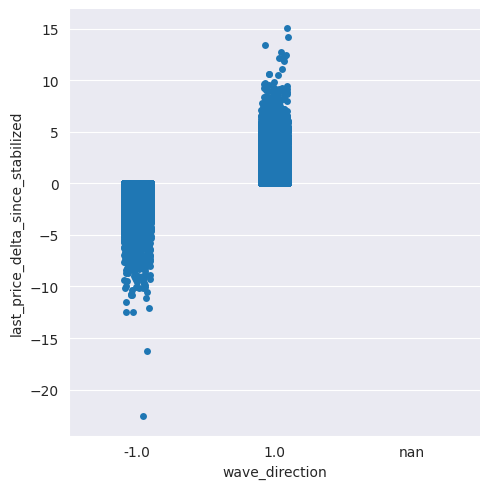

In [3]:
# df.wave_direction.mean()
sns.catplot(x=df.wave_direction, y=df.last_price_delta_since_stabilized)


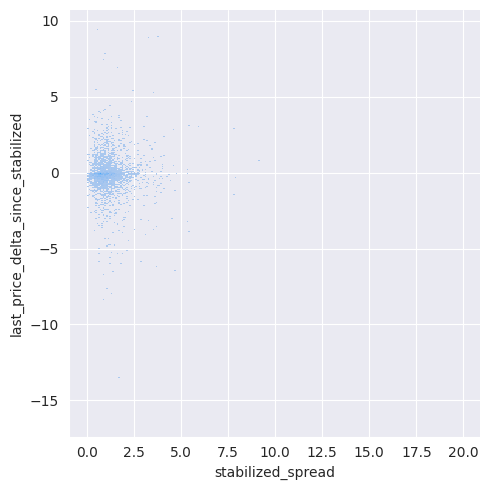

In [4]:
sns.displot(y=df.last_price_delta_since_stabilized, x=df.stabilized_spread)


<AxesSubplot: xlabel='past_final_price_0', ylabel='last_price_delta_since_stabilized'>

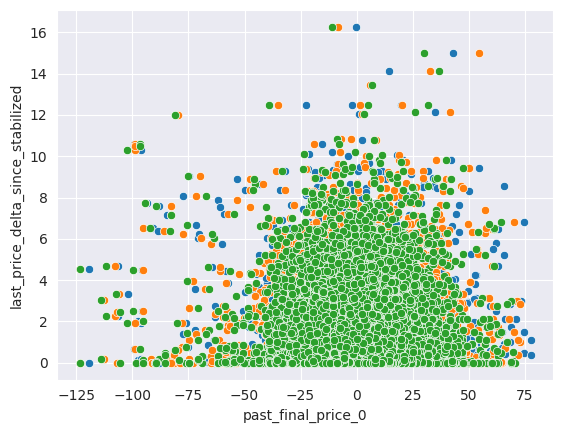

In [6]:
sns.scatterplot(x=df['past_final_price_0'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['past_final_price_1'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['past_final_price_2'], y=abs(df.last_price_delta_since_stabilized))

